In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt

# Local imports
from src.util import load_tools, plot_tools
from src.model import TransformerRegressionModel
from src.plot import plot_result
from src.train import train_model
from src.evaluate import evaluate_model

In [3]:
input_message = '''
Please choose a data input option:
1. PC-GMM benchmark data
2. LASA benchmark data
3. Damm demo data
4. DEMO
Enter the corresponding option number: '''
input_opt  = input(input_message)

data, _ , x_att, x_init = load_tools.load_data(int(input_opt))

seq_length = 2  # Adjust based on your needs

X_train, Y_train = load_tools.create_sequences(data, seq_length)

print(f'Shape of X: {X_train.shape}')  #(number_of_sequences, seq_length, N)
print(f'Shape of y: {Y_train.shape}')  #(number_of_sequences, N)


You selected LASA benchmark dataset.

Shape of X: (998, 2, 2)
Shape of y: (998, 2)


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_dim = X_train.shape[2] 
output_dim = Y_train.shape[1] 
nhead = 2  # Number of attention heads
num_encoder_layers = 2  # Number of transformer encoder layers
dim_feedforward = 64  # Dimension of the feedforward network model

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
Y_train = torch.tensor(Y_train, dtype=torch.float32).to(device)

model = TransformerRegressionModel(input_dim, nhead, num_encoder_layers, dim_feedforward, output_dim)

model.to(device)

criterion = nn.MSELoss()  

optimizer = optim.Adam(model.parameters(), lr=0.03)  

/Users/sunansun/miniconda3/envs/venv/lib/python3.9/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [13]:
train_model(model, criterion, optimizer, X_train, Y_train, num_epochs=500)

Epoch 0, Loss: 1.777409315109253
Epoch 10, Loss: 1.8418278694152832
Epoch 20, Loss: 1.7631081342697144
Epoch 30, Loss: 1.5469061136245728
Epoch 40, Loss: 1.7164262533187866
Epoch 50, Loss: 1.7742643356323242
Epoch 60, Loss: 1.5113062858581543
Epoch 70, Loss: 1.510968565940857
Epoch 80, Loss: 1.7247198820114136
Epoch 90, Loss: 1.4161888360977173
Epoch 100, Loss: 1.7677336931228638
Epoch 110, Loss: 1.263527512550354
Epoch 120, Loss: 1.5768111944198608
Epoch 130, Loss: 1.7546364068984985
Epoch 140, Loss: 1.6012251377105713
Epoch 150, Loss: 1.6420059204101562
Epoch 160, Loss: 1.837733268737793
Epoch 170, Loss: 1.4993935823440552
Epoch 180, Loss: 1.5014971494674683
Epoch 190, Loss: 1.3245130777359009
Epoch 200, Loss: 2.087963819503784
Epoch 210, Loss: 1.2795135974884033
Epoch 220, Loss: 1.419850468635559
Epoch 230, Loss: 2.0584959983825684
Epoch 240, Loss: 1.2445154190063477
Epoch 250, Loss: 1.318875789642334
Epoch 260, Loss: 1.218879222869873
Epoch 270, Loss: 1.0959179401397705
Epoch 280, 

TransformerRegressionModel(
  (input_linear): Linear(in_features=2, out_features=64, bias=True)
  (positional_encoding): PositionalEncoding()
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=64, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=64, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2

Test Loss: 0.6954364776611328


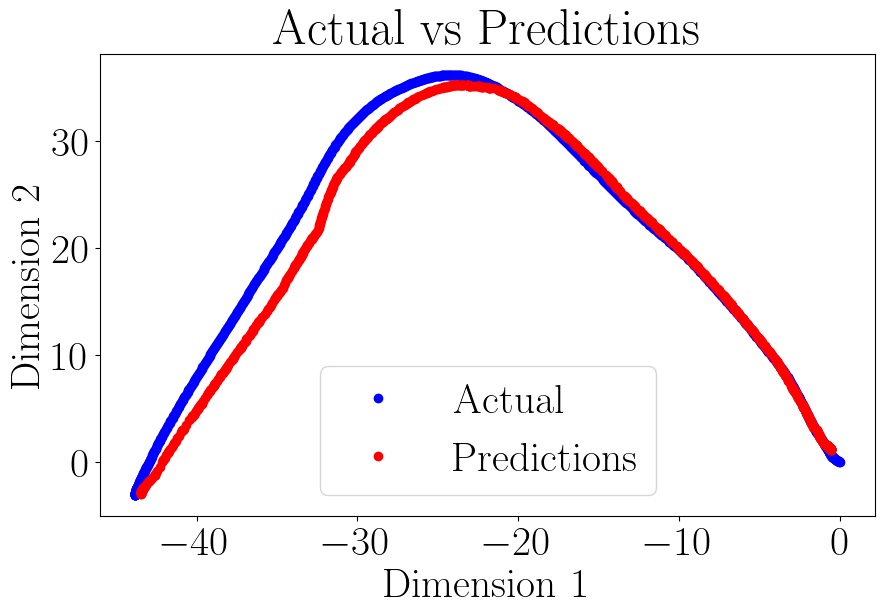

In [12]:
noise = torch.normal(mean=0.0, std=0.01, size=X_train.shape).to(device)
X_train_noisy = X_train + noise

test_loss, Y_test = evaluate_model(model, criterion, X_train_noisy, Y_train)


plot_result(Y_train, Y_test)
plt.show()